In [4]:
# STEP 1: Load Data
import pandas as pd
import numpy as np

# Load dataset
bank_df = pd.read_csv("bank.csv")

# Display first few rows
print(bank_df.head())

# Explanation:
# - pd.read_csv(): File load karta hai
# - head(): Pehli 5 rows dikhata hai taake data ka structure samajh aaye


#  STEP 2: Check Missing Values
print(bank_df.isnull().sum())

# Explanation:
# - isnull(): Missing values ko True/False mein convert karta hai
# - sum(): Har column ke missing values count karta hai

# STEP 3: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
# Encode all object-type columns
label_encoders = {}
for col in bank_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    bank_df[col] = le.fit_transform(bank_df[col])
    label_encoders[col] = le

# Explanation:
# - LabelEncoder(): Strings (e.g., "yes", "no") ko numbers mein convert karta hai
# - select_dtypes(): Sirf categorical columns ko filter karta hai



   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing  

In [5]:
# STEP 4: Feature and Target Split
X = bank_df.drop("deposit", axis=1)
Y = bank_df["deposit"]

# Explanation:
# - 'y' column prediction target hai (term deposit ka subscription)
# - X: Features (input variables)
# - Y: Labels (output we want to predict)

In [6]:
# STEP 5: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Explanation:
# - StandardScaler(): Features ko normalize karta hai taake values same scale par ho
# - fit_transform(): Mean = 0, Std = 1 scale apply karta hai

In [7]:
# STEP 6: Feature Selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 10 features
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_scaled, Y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

# Explanation:
# - SelectKBest(): Sabse important features choose karta hai
# - mutual_info_classif(): Classification ke liye relevance check karta hai
# - get_support(): True/False array deta hai ke kaun se columns select hue

Selected Features: Index(['age', 'job', 'balance', 'contact', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [8]:
# STEP 7: Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_model = LogisticRegression()
log_scores = cross_val_score(log_model, X_selected, Y, cv=5)
print("Logistic Regression Accuracy:", log_scores.mean())

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_model, X_selected, Y, cv=5)
print("Decision Tree Accuracy:", tree_scores.mean())

# Random Forest (Ensemble)
forest_model = RandomForestClassifier()
forest_scores = cross_val_score(forest_model, X_selected, Y, cv=5)
print("Random Forest Accuracy:", forest_scores.mean())

# Explanation:
# - cross_val_score(): 5-fold cross-validation karta hai
# - mean(): Average accuracy return karta hai

Logistic Regression Accuracy: 0.7338265862181325
Decision Tree Accuracy: 0.7281026537422532
Random Forest Accuracy: 0.7947574425327484


In [9]:
# STEP 8: Evaluate with Other Metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# Train best model (Random Forest)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred))

# Explanation:
# - classification_report(): Accuracy, Precision, Recall, F1-Score deta hai
# - RandomForestClassifier best model use hua kyun ke uski average accuracy zyada thi

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1166
           1       0.80      0.84      0.82      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



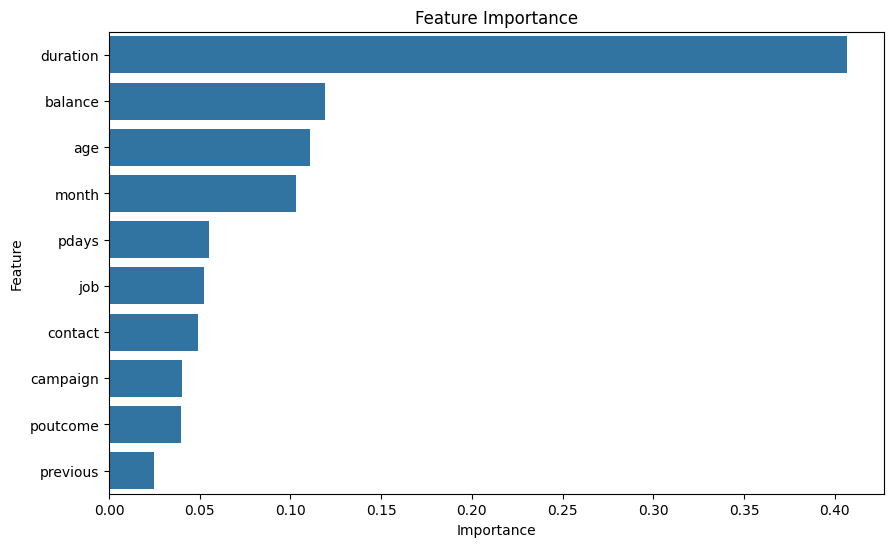

In [10]:
# STEP 9: Feature Importance Analysis
import matplotlib.pyplot as plt
import seaborn as sns

importances = forest_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

# Explanation:
# - feature_importances_: Batata hai ke kaun se features prediction mein zyada helpful thay
# - barplot(): Visual representation deta hai importance ka